In [25]:
from sklearn import tree
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [61]:
perc = 0.8
q_flex = students['E_grade'].quantile(perc)

students['E_result'] = np.where(students['E_grade']<q_flex, 0, 1)

exclude_cols = ['us_user','user_name','user_email','start_semester','archived','user_type','HGF','convocatore','teacher','supervisor','ispettore','statista','student','classes','companies','avg_specific_evaluations','avg_supervisor_evaluation','grade_1st','grade_2nd','grade_3rd','E_grade','E_result']
exclude_cols += ['n_activities_school_year_1','n_activities_school_year_2','n_activities_school_year_3']
exclude_cols += ['n_in_curriculum_semester1','n_in_curriculum_semester2','n_in_curriculum_semester3','n_in_curriculum_semester4','n_in_curriculum_semester5']
sel_cols = list(set(students.columns) - set(exclude_cols))

X = students[sel_cols]
y = students['E_result']

imp = SimpleImputer(strategy="mean")
X = imp.fit_transform(X)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Try with simple Decision Tree

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

dt = tree.DecisionTreeClassifier()

parameters = {"max_depth": [4,6,8,10,None],
              "max_features": [2, 3, 4, 6, 8, 10],
              "min_samples_leaf":  [8,10,12],
             }

tcv = GridSearchCV(estimator=dt,  param_grid = parameters, verbose=1, scoring = "f1")

tcv.fit(X_train, y_train)



clf = tcv.best_estimator_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.5s finished


In [63]:
y_pred = clf.predict(X_test)
print("F1:",metrics.f1_score(y_test, y_pred))

F1: 0.38888888888888884


In [64]:
tcv.best_params_

{'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 8}

In [65]:
tcv.best_score_

0.3684237331296155

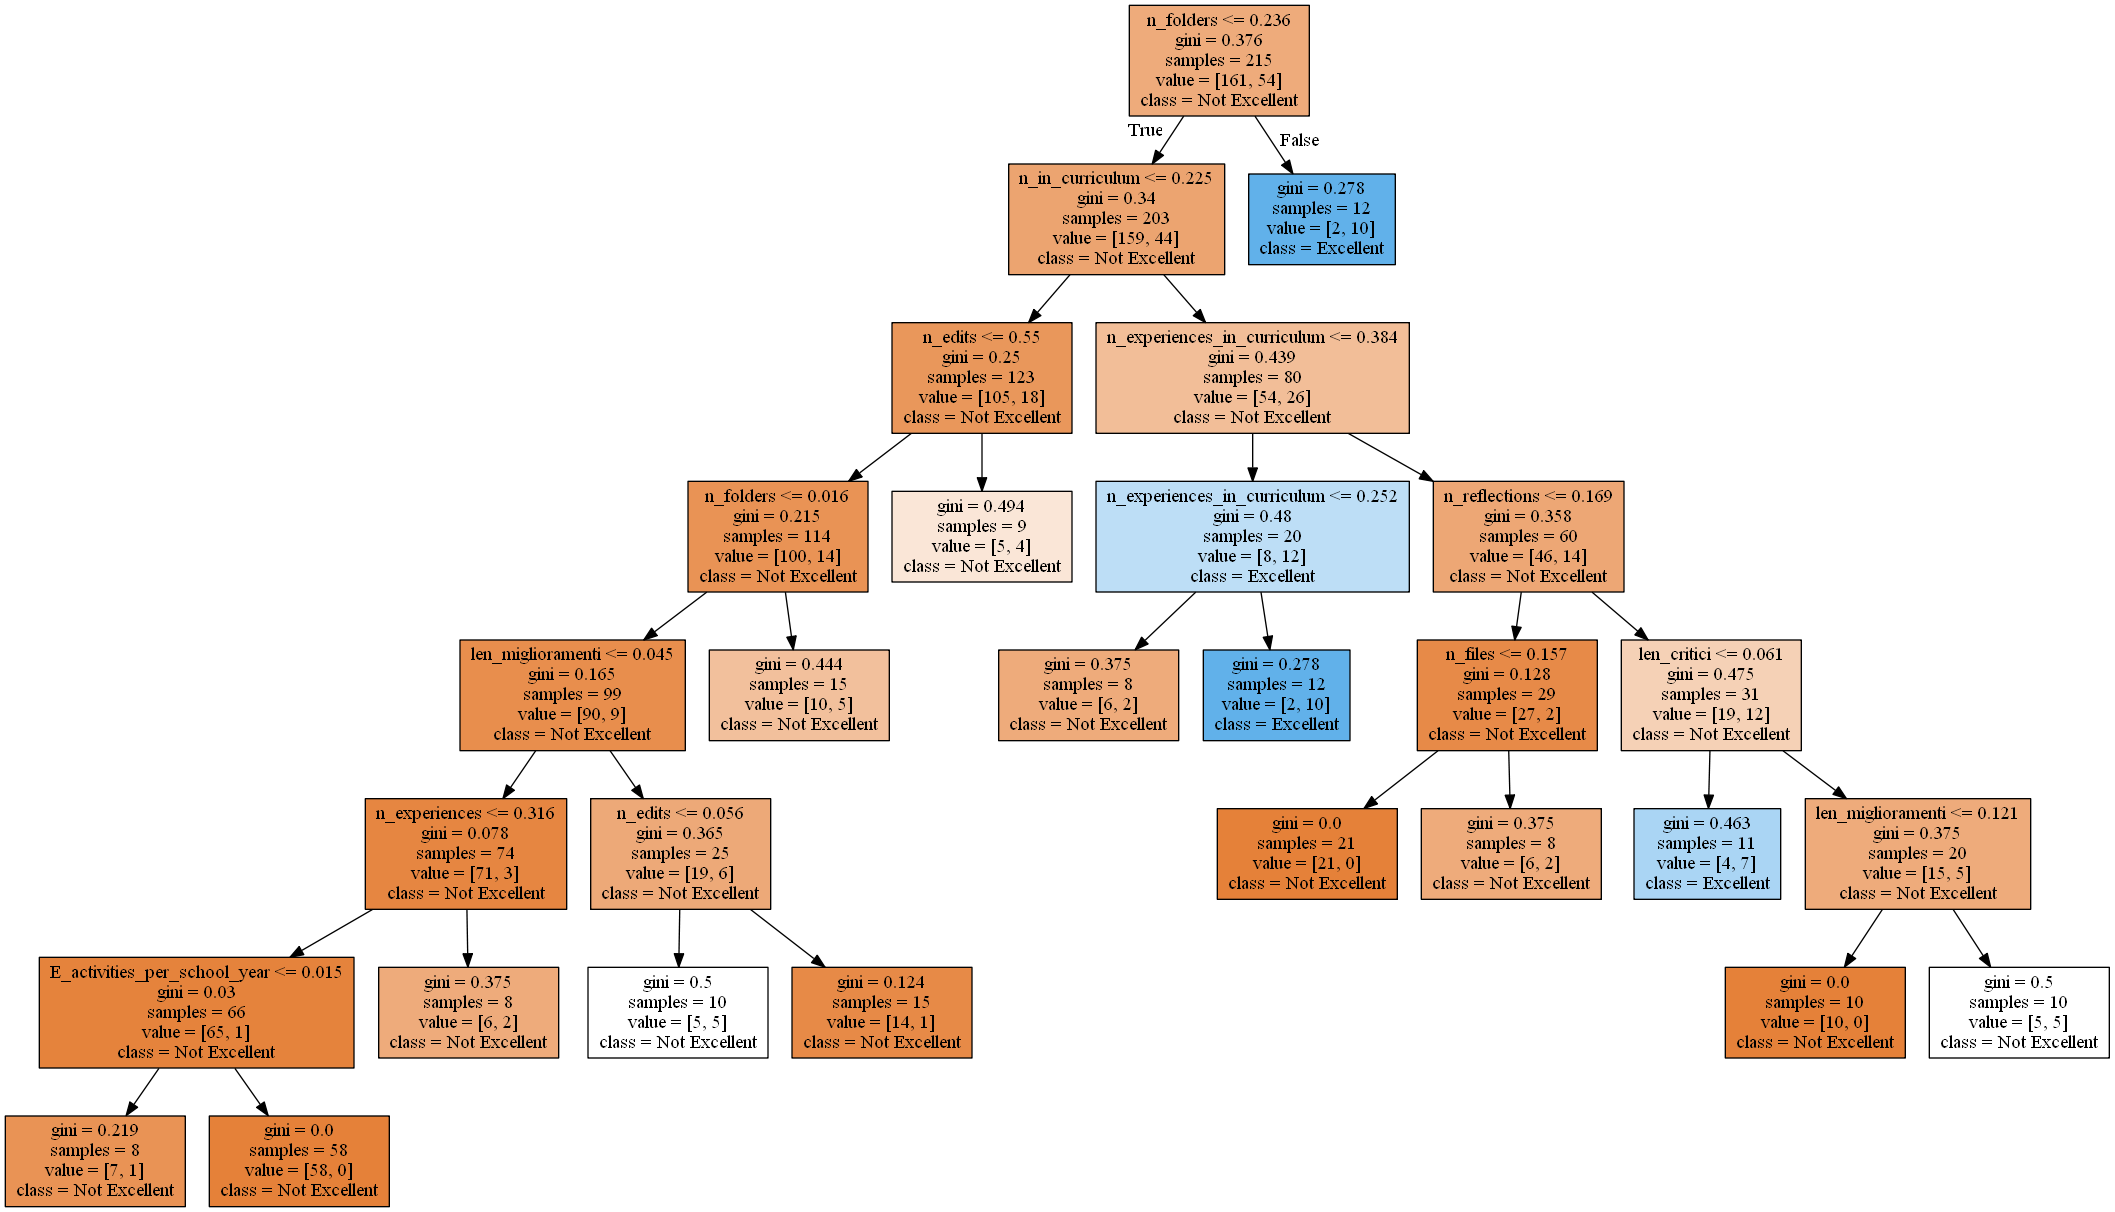

In [66]:
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = sel_cols, 
                     class_names=['Not Excellent','Excellent'],
                     filled = True)

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

# Display in jupyter notebook
Image(filename = 'tree.png')

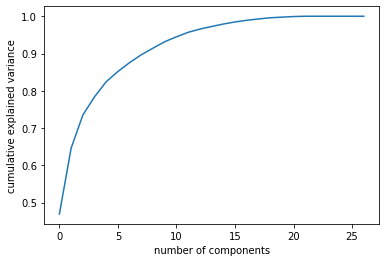

In [67]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [68]:
n_components = 6
pca = PCA(n_components=n_components)
X = pca.fit_transform(X)

In [69]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Classifiers:

In [71]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix

In [81]:
clfs = {
    'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
    'svm': SVC(kernel='linear'),
    'mlp': MLPClassifier(),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression()
}

In [82]:
f1_scores = dict()
for clf_name in clfs:
    print(clf_name)
    clf = clfs[clf_name]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_scores[clf_name] = f1_score(y_pred, y_test)

mnb
gnb
svm
mlp


C:\Users\Erika\miniconda3\envs\dualt\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



ada
dtc
rfc
gbc
lr


In [83]:
f1_scores

{'mnb': 0.0,
 'gnb': 0.3333333333333333,
 'svm': 0.0,
 'mlp': 0.0909090909090909,
 'ada': 0.31578947368421056,
 'dtc': 0.2790697674418604,
 'rfc': 0.25806451612903225,
 'gbc': 0.36363636363636365,
 'lr': 0.0909090909090909}

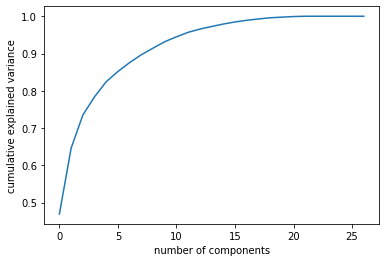

### Random Forest and parameters tuning

In [44]:
rf = RandomForestClassifier()

In [45]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 600, stop = 2000, num = 8)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4,6,8]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [4, 6, 8],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [46]:
rf_random = RandomizedSearchCV(
    estimator = rf, param_distributions = random_grid, #scoring = "f1",
    n_iter = 100, cv = 3, verbose=0, random_state=42, 
    n_jobs = -1
)

In [47]:
q_flex = students['E_grade'].quantile(0.8)

students['E_result'] = np.where(students['E_grade']<q_flex, 0, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf_random.fit(X_train, y_train)

score = rf_random.score(X_test,y_test)

print()
print(f'PERCENT: {perc}: \t{round(score,3)}')


PERCENT: 0.8: 	0.806


NameError: name 'rfs' is not defined

In [48]:
y_pred = rf_random.best_estimator_.predict(X_test)
print("F1:",metrics.f1_score(y_test, y_pred))

F1: 0.18181818181818182


In [ ]:
rfs = {}
for i in range(70,85,5):
    perc = i/100
    q_flex = students['E_grade'].quantile(perc)

    students['E_result'] = np.where(students['E_grade']<q_flex, 'Not Exceptional', 'Exceptional')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    rf_random.fit(X_train, y_train)
    
    score = rf_random.score(X_test,y_test)
    
    print()
    print(f'PERCENT: {perc}: \t{round(score,3)}')
    
    rfs[i] = rf_random

In [ ]:
rf_random.best_params_

In [ ]:
rf_random.score(X_test,y_test)

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50,60,None],
    'max_features': ['auto'],
    'min_samples_leaf': [6],
    'min_samples_split': [5,6,8],
    'n_estimators': [200,300,400]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
best_grid.score(X_test,y_test)

In [ ]:
best_grid.predict(X_test).sum()/len(X_test)*100

In [ ]:
y_test.sum()/len(y_test)*100

In [ ]:
len(best_grid.estimators_)

In [ ]:
# Extract single tree
estimator = best_grid.estimators_[10]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = sel_cols,
                class_names = grid_search.classes_,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

# Display in jupyter notebook
Image(filename = 'tree.png')